# Relatório de Análises VII

## Criando Agrupamentos

In [21]:
import pandas as pd

In [22]:
dados = pd.read_csv('dados/aluguel_residencial.csv', sep=';')

In [23]:
dados

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,42.50,Apartamento
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,70.00,Casa
2,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
3,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
4,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
...,...,...,...,...,...,...,...,...,...,...,...
21821,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0,12.86,Apartamento
21822,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0,29.63,Apartamento
21823,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0,23.08,Apartamento
21824,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0,29.17,Apartamento


In [24]:
dados['Valor'].mean()

5046.172821405663

In [25]:
bairros = dados['Bairro'].unique()
bairros

array(['Copacabana', 'Jardim Botânico', 'Centro', 'Higienópolis',
       'Cachambi', 'Barra da Tijuca', 'Ramos', 'Grajaú',
       'Lins de Vasconcelos', 'Taquara', 'Freguesia (Jacarepaguá)',
       'Tijuca', 'Olaria', 'Ipanema', 'Campo Grande', 'Botafogo',
       'Recreio dos Bandeirantes', 'Leblon', 'Jardim Oceânico', 'Humaitá',
       'Península', 'Méier', 'Vargem Pequena', 'Maracanã', 'Jacarepaguá',
       'São Conrado', 'Vila Valqueire', 'Gávea', 'Cosme Velho',
       'Bonsucesso', 'Todos os Santos', 'Laranjeiras', 'Itanhangá',
       'Flamengo', 'Piedade', 'Lagoa', 'Catete', 'Jardim Carioca',
       'Benfica', 'Glória', 'Praça Seca', 'Vila Isabel', 'Engenho Novo',
       'Engenho de Dentro', 'Pilares', 'Água Santa', 'São Cristóvão',
       'Ilha do Governador', 'Jardim Sulacap', 'Oswaldo Cruz',
       'Vila da Penha', 'Anil', 'Vargem Grande', 'Tanque', 'Vaz Lobo',
       'Madureira', 'São Francisco Xavier', 'Pechincha', 'Leme', 'Irajá',
       'Quintino Bocaiúva', 'Urca', 'Penha',

In [26]:
selecao = dados['Bairro'].isin(bairros)

In [27]:
dados = dados[selecao]

In [28]:
dados['Bairro'].drop_duplicates()

0             Copacabana
1        Jardim Botânico
2                 Centro
3           Higienópolis
4               Cachambi
              ...       
13855          Bancários
15277         Cavalcanti
15280       Rio da Prata
15412      Cidade Jardim
16428        Coelho Neto
Name: Bairro, Length: 152, dtype: object

In [29]:
grupo_bairro = dados.groupby('Bairro')

In [30]:
type (grupo_bairro)

pandas.core.groupby.generic.DataFrameGroupBy

In [31]:
grupo_bairro.groups

{'Abolição': [1553, 3184, 6655, 6951, 7634, 10138, 13165, 14187, 16054, 16639, 17139, 18797, 18805, 20106, 21387], 'Alto da Boa Vista': [2201, 12039, 12556, 13240, 13438, 14518], 'Anchieta': [3017, 8880, 15660, 17811], 'Andaraí': [384, 452, 514, 613, 790, 846, 854, 996, 1191, 1416, 1421, 1685, 1912, 2014, 2683, 3137, 3216, 3489, 3578, 3738, 3856, 4227, 4572, 4773, 4876, 4883, 4961, 5545, 5753, 5990, 6232, 6450, 6529, 6911, 7168, 7408, 7889, 7890, 8064, 8430, 9190, 9290, 9334, 9380, 9713, 9929, 10104, 10255, 10275, 10859, 10940, 10947, 11079, 11516, 11818, 12292, 12762, 13243, 13385, 13389, 13769, 13897, 13931, 13938, 14214, 14592, 14668, 15915, 16009, 16504, 16509, 16599, 16654, 17510, 17769, 17794, 17913, 18212, 18433, 18754, 18888, 18918, 19041, 19668, 19750, 19770, 20100, 20219, 20516, 20866, 21028, 21074, 21114, 21326, 21455, 21543, 21582], 'Anil': [241, 572, 604, 1227, 1632, 1664, 1789, 1932, 2127, 2378, 3586, 3675, 3860, 4153, 4369, 4651, 4769, 4790, 5261, 5340, 5660, 6130, 6150,

In [32]:
for bairro , data in grupo_bairro:
    print('{} -> {}'.format(bairro, data.Valor.mean()))

Abolição -> 1195.3333333333333
Alto da Boa Vista -> 3966.6666666666665
Anchieta -> 875.0
Andaraí -> 1464.7113402061855
Anil -> 2048.8732394366198
Arpoador -> 12923.916666666666
Bancários -> 1825.0
Bangu -> 1016.0
Barra da Tijuca -> 7069.552938130986
Barra de Guaratiba -> 5550.0
Benfica -> 996.0
Bento Ribeiro -> 1030.8695652173913
Bonsucesso -> 1225.9322033898304
Botafogo -> 8791.828178694159
Braz de Pina -> 1115.0
Cachambi -> 1157.1742424242425
Cachamorra -> 3000.0
Cacuia -> 916.6666666666666
Caju -> 850.0
Camorim -> 1735.2272727272727
Campinho -> 1037.3333333333333
Campo Grande -> 1267.71714922049
Cascadura -> 948.7096774193549
Catete -> 2267.0625
Catumbi -> 1112.5
Cavalcanti -> 595.0
Centro -> 1254.7521865889212
Cidade Jardim -> 12000.0
Cidade Nova -> 1471.4285714285713
Cocotá -> 1883.3333333333333
Coelho Neto -> 700.0
Colégio -> 885.0
Copacabana -> 4126.677004538578
Cordovil -> 905.5555555555555
Cosme Velho -> 5343.548387096775
Cosmos -> 658.3333333333334
Curicica -> 1514.5657894736

In [33]:
grupo_bairro[['Valor', 'Condominio']].mean(). round(2)

,Valor,Condominio
Bairro,,
Abolição,1195.33,191.40
Alto da Boa Vista,3966.67,885.00
Anchieta,875.00,19.75
Andaraí,1464.71,497.71
Anil,2048.87,455.85
...,...,...
Vila Valqueire,1769.58,276.88
Vila da Penha,1260.58,232.68
Vista Alegre,1114.38,210.06


## Estatísticas Descritivas 

In [34]:
grupo_bairro['Valor'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Bairro,,,,,,,,
Abolição,15.0,1195.33,425.32,800.0,900.0,1180.0,1200.0,2300.0
Alto da Boa Vista,6.0,3966.67,5513.59,600.0,1150.0,1725.0,3275.0,15000.0
Anchieta,4.0,875.00,132.29,700.0,812.5,900.0,962.5,1000.0
Andaraí,97.0,1464.71,408.11,700.0,1200.0,1400.0,1650.0,2950.0
Anil,71.0,2048.87,1523.97,300.0,1100.0,1500.0,2675.0,7000.0
...,...,...,...,...,...,...,...,...
Vila Valqueire,48.0,1769.58,2203.01,800.0,1000.0,1250.0,1700.0,16000.0
Vila da Penha,104.0,1260.58,644.66,450.0,900.0,1100.0,1302.5,4500.0
Vista Alegre,16.0,1114.38,199.60,700.0,1012.5,1200.0,1225.0,1400.0


In [37]:
grupo_bairro['Valor'].aggregate(['min', 'max']).rename(columns = {'min' : 'Mínimo', 'max' : 'Máximo'})

,Mínimo,Máximo
Bairro,,
Abolição,800.0,2300.0
Alto da Boa Vista,600.0,15000.0
Anchieta,700.0,1000.0
Andaraí,700.0,2950.0
Anil,300.0,7000.0
...,...,...
Vila Valqueire,800.0,16000.0
Vila da Penha,450.0,4500.0
Vista Alegre,700.0,1400.0


In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (20,10))

Text(0.5, 1.0, 'Valor Médio do Aluguel por Bairro')

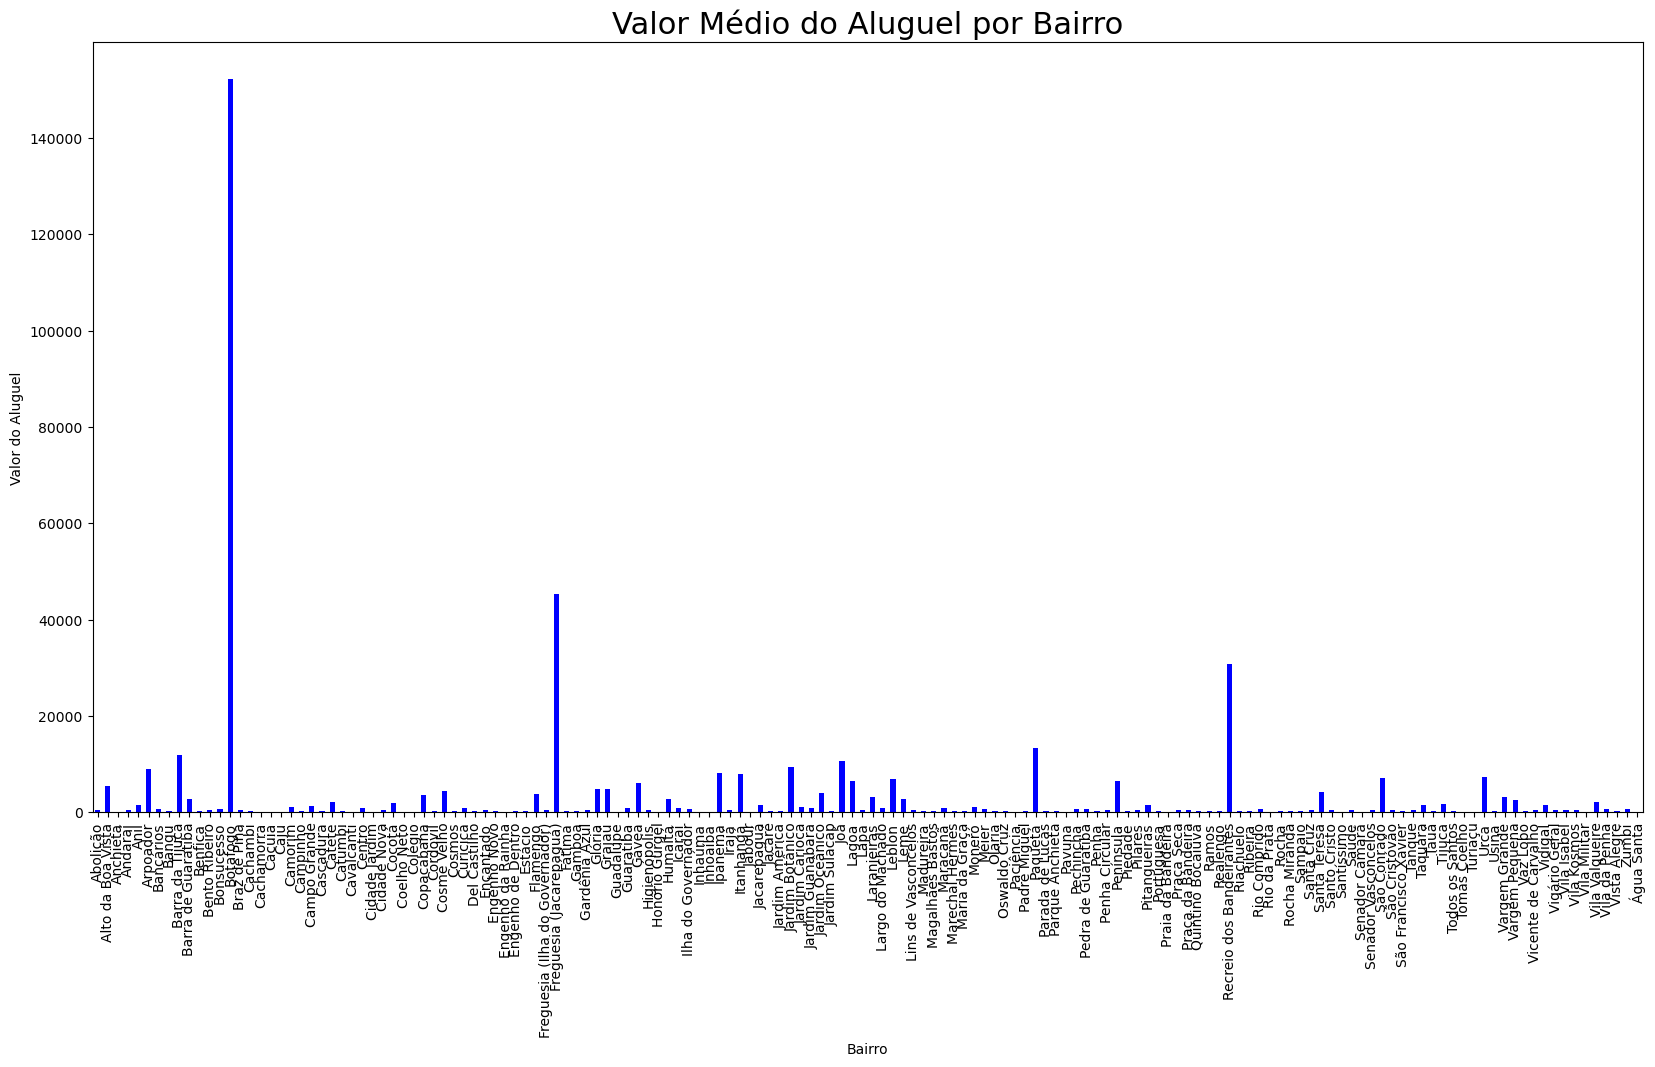

In [43]:
fig = grupo_bairro['Valor'].std().plot.bar(color = 'blue')
fig.set_ylabel('Valor do Aluguel')
fig.set_title ('Valor Médio do Aluguel por Bairro', {'fontsize':22})